In [ ]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('E:\BaiduNetdiskDownload/000001.csv')#读取CSV文件
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')# 将'Day'列（字符串格式日期）转为pandas datetime类型建立后续时间索引和筛选
data.set_index('Day', inplace = True)#直接在原数据上修改不创建新对象
data.sort_values(by = ['Day'],axis=0, ascending=True)#按日期排序（升序）

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [ ]:
data_new = data['1995-01':'2024-09'].copy()#建立原数据的独立副本
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [ ]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data#计算月度收益率

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [ ]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Quarter_data#计算季度收益率

,Raw_return
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [ ]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Year_data#计算年度收益率

,Raw_return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [ ]:
inflation = pd.read_csv('datasets/inflation.csv')#读取通胀数据CSV文件
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')#日期格式转换，设置日期索引
inflation.set_index('month',inplace=True)#按日期升序排列 
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2024-05-31,0.3
2024-06-30,0.2
2024-07-31,0.5


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)

## 模型1 通货膨胀与股票预期收益率


$$
r_{t+1} = \alpha + \beta*CPI_{t-1} + \varepsilon_{t+1}
$$

两个假设：

* H1： $\beta > 0$

* H2： $\beta < 0$

In [ ]:
reg_data = pd.merge(Month_data, inflation, left_index=True, right_index=True,how='left')
reg_data#时间序列数据合并：将月度股票数据（Month_data）与通胀数据（inflation）按日期索引对齐

,Raw_return,cpi
Day,,
1995-01-31,-0.131631,24.1
1995-02-28,-0.023694,22.4
1995-03-31,0.177803,21.3
1995-04-30,-0.103552,20.7
1995-05-31,0.207922,20.3
...,...,...
2024-05-31,-0.005801,0.3
2024-06-30,-0.038684,0.2
2024-07-31,-0.009656,0.5


In [26]:
# 导出数据
reg_data.to_csv('datasets/reg_data.csv')
# save as excel
reg_data.to_excel('datasets/reg_data.xlsx')

## 作图 Plot

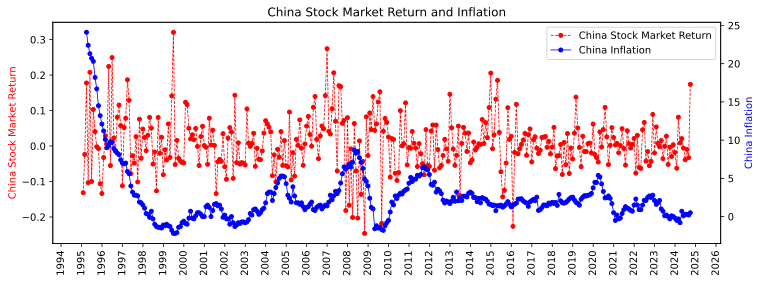

In [ ]:

fig, ax1 = plt.subplots(figsize=(12,4))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data['Raw_return'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='--',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(reg_data['cpi'].shift(2),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Inflation')

ax2.set_ylabel('China Inflation',color='blue')

plt.title('China Stock Market Return and Inflation')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# save figure
fig.savefig('images/China Stock Market Return and Inflation.png',dpi = 1000,bbox_inches='tight')

plt.show();


## 描述性统计 Summary


In [ ]:
reg_data['cpi'].describe().round(5)#对合并后数据中CPI（居民消费价格指数）字段进行描述性统计，并保留5位小数

count    357.00000
mean       2.57131
std        3.64392
min       -2.20000
25%        0.70000
50%        1.80140
75%        3.05190
max       24.10000
Name: cpi, dtype: float64

In [ ]:
reg_data['cpi'].skew()#计算CPI（居民消费价格指数）数据的偏度
reg_data['cpi'].kurt()#计算CPI数据的峰度

2.837376896439755

11.29962775033307

## OLS 回归结果

In [12]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     9.517
Date:                Tue, 22 Oct 2024   Prob (F-statistic):            0.00223
Time:                        20:36:05   Log-Likelihood:                 371.45
No. Observations:                 297   AIC:                            -738.9
Df Residuals:                     295   BIC:                            -731.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0204      0.007      3.021      0.0

## 预期收益率 Expected Return / Conditional Return

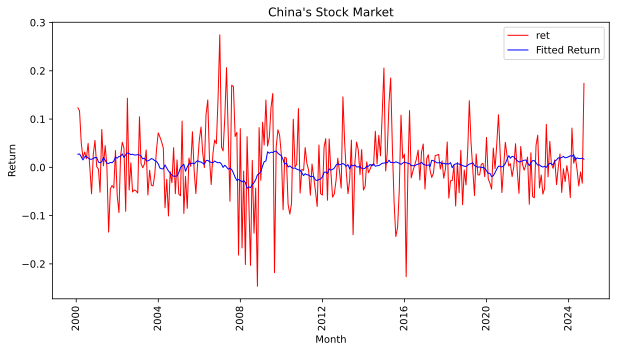

In [13]:
data = reg_data['2000-01':'2024-09'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('Raw_return',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)
plt.legend()
fig.savefig('images/fitted_return.pdf', bbox_inches='tight')  # 更改输出图片格式 jpg
plt.show();


## 季度结果

In [ ]:
Q_reg_data = reg_data['1995-01':'2024-09'].resample('QE').apply({#构建季度频率的回归数据集（Q_reg_data）
    'Raw_return':
    lambda x: (1 + x).prod() - 1,
    'cpi':
    lambda x: sum(x)
})
Q_reg_data['lag_cpi'] = Q_reg_data['cpi'].shift(1)
Q_reg_data

,Raw_return,cpi,lag_cpi
Day,,,
1995-03-31,-0.001466,6.780000e+01,NaN
1995-06-30,-0.025258,5.920000e+01,6.780000e+01
1995-09-30,0.145660,4.440000e+01,5.920000e+01
1995-12-31,-0.231358,3.340000e+01,4.440000e+01
1996-03-31,0.001981,2.810000e+01,3.340000e+01
...,...,...,...
2023-09-30,-0.028603,-2.000000e-01,3.000000e-01
2023-12-31,-0.043575,-1.000000e+00,-2.000000e-01
2024-03-31,0.022263,-8.326673e-17,-1.000000e+00


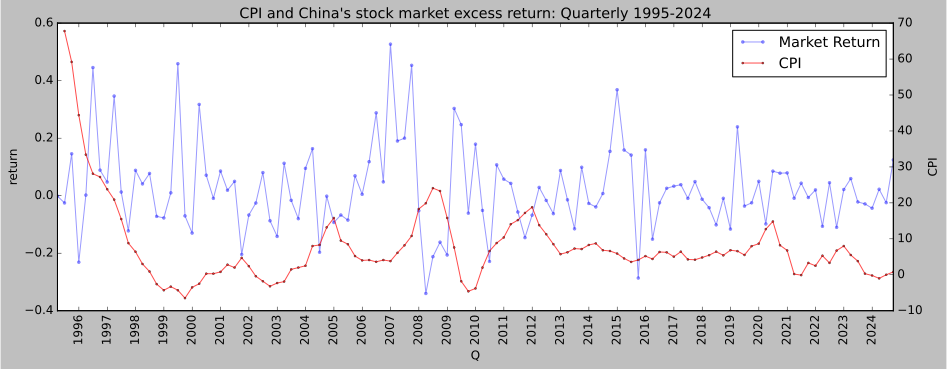

In [16]:
# Change the figure style
plt.style.use('classic')
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Q_reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("CPI and China's stock market excess return: Quarterly 1995-2024")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90) # 转置x轴的日期显示格式

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Q_reg_data['lag_cpi'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('Qcpi.pdf', bbox_inches='tight')
plt.show();

In [17]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(1)
model_qcpi = smf.ols('Raw_return ~ lcpi',
                 data=Q_reg_data['2000':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     8.237
Date:                Tue, 22 Oct 2024   Prob (F-statistic):            0.00504
Time:                        20:36:07   Log-Likelihood:                 56.620
No. Observations:                  99   AIC:                            -109.2
Df Residuals:                      97   BIC:                            -104.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0620      0.022      2.825      0.0

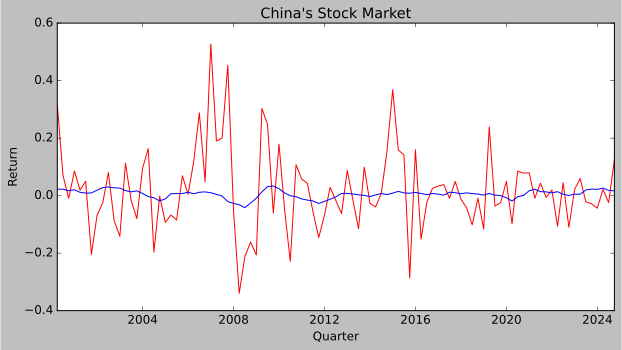

In [18]:
data = Q_reg_data['2000-01':'2024-09'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('Raw_return',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Quarter')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

plt.show();

## 长期预测 Long Horizon Forecast

$$
r_{t+1} + r_{t+2} + r_{t+3}  =\alpha+\beta x_{t}+\varepsilon_{t+1}
$$

In [ ]:
reg_data['next_ret'] = reg_data['Raw_return'].shift(-1) + 1#计算下一期（t+1期）的"1+收益率"：将当前期（t期）的原始收益率（Raw_return）向后偏移1位，再+1
reg_data['next_ret2'] = reg_data['Raw_return'].shift(-2) + 1#计算下下期（t+2期）的"1+收益率"：将当前期（t期）的原始收益率向后偏移2位，再+1
reg_data['next_ret3'] = reg_data['Raw_return'].shift(-3) + 1#计算下下下期（t+3期）的"1+收益率"：将当前期（t期）的原始收益率向后偏移3位，再+1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,Raw_return,cpi,lcpi,next_ret,next_ret2,next_ret3,future_3month_return
Day,,,,,,,
1995-01-31,-0.131631,24.1,NaN,0.976306,1.177803,0.896448,0.030822
1995-02-28,-0.023694,22.4,NaN,1.177803,0.896448,1.207922,0.275370
1995-03-31,0.177803,21.3,0.241,0.896448,1.207922,0.900173,-0.025258
1995-04-30,-0.103552,20.7,0.224,1.207922,0.900173,1.103032,0.199369
1995-05-31,0.207922,20.3,0.213,0.900173,1.103032,1.040716,0.033347
...,...,...,...,...,...,...,...
2024-05-31,-0.005801,0.3,0.001,0.961316,0.990344,0.967151,-0.079240
2024-06-30,-0.038684,0.2,0.003,0.990344,0.967151,1.173908,0.124383
2024-07-31,-0.009656,0.5,0.003,0.967151,1.173908,NaN,NaN


In [ ]:
model_cpi_3month = smf.ols('future_3month_return ~ lcpi',#构建OLS回归模型：分析滞后CPI对未来3个月累计收益率的影响
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                             OLS Regression Results                             
Dep. Variable:     future_3month_return   R-squared:                       0.063
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     6.767
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):            0.00976
Time:                          20:36:07   Log-Likelihood:                 173.53
No. Observations:                   294   AIC:                            -343.1
Df Residuals:                       292   BIC:                            -335.7
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0519      0.020

# 整理结果

In [21]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_cpi, model_cpi_3month, model_qcpi],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=["Next Month's Return", "Next 3 Months' Return", 'Quarter Return'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return')

print(results_table)

          Table - OLS Regressions: Forecast Stock Market Return
                 Next Month's Return Next 3 Months' Return Quarter Return
-------------------------------------------------------------------------
Intercept        0.020***            0.052***              0.062***      
                 (0.007)             (0.020)               (0.022)       
lcpi             -0.734***           -1.794***             -0.007***     
                 (0.238)             (0.689)               (0.002)       
R-squared        0.040               0.063                 0.081         
R-squared Adj.   0.037               0.060                 0.071         
No. observations 297                 294                   99            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# CPI的自相关性

In [22]:
reg_data['lcpi'] = reg_data['cpi'].shift(1)
model_cpiself = smf.ols('cpi~lcpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          1.16e-116
Time:                        20:36:07   Log-Likelihood:                -261.80
No. Observations:                 297   AIC:                             527.6
Df Residuals:                     295   BIC:                             535.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1069      0.048      2.212      0.0

In [23]:
model_cpiself = smf.ols('Raw_return~cpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.144
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0773
Time:                        20:36:07   Log-Likelihood:                 368.48
No. Observations:                 297   AIC:                            -733.0
Df Residuals:                     295   BIC:                            -725.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0164      0.007      2.397      0.0